<a href="https://colab.research.google.com/github/minhe8564/Assignment/blob/main/Machine-learning/231116_Basecode_Simplified_VGG_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패키지 선언

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## Dataset 다운로드

In [2]:
# Training dataset 다운로드
cifar10_train = dataset.CIFAR10(root = "./",
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
cifar10_test = dataset.CIFAR10(root = "./",
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

dataLabel = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Files already downloaded and verified
Files already downloaded and verified


## 신경망 모델 정의
- Fully Connected Layer -> nn.Linear(in_features, out_features)
- Convolutional Layer -> nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
- ReLU -> nn.ReLU()
- Max Pooling -> nn.MaxPool2d(kernel_size, stride)


In [3]:
class SimplifiedVGG(nn.Module):

  def __init__(self):
    super(SimplifiedVGG, self).__init__()

    # 신경망 파라미터 초기화 (Conv 6개, FC 3개, ReLU, MaxPool)
    self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)    # Convolution: [3x3x3]x16, s1, p1
    self.conv1_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)   # Convolution: [3x3x16]x32, s1, p1

    self.conv2_1 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)   # Convolution: [3x3x32]x32, s1, p1
    self.conv2_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)   # Convolution: [3x3x32]x64, s1, p1

    self.conv3_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)  # Convolution: [3x3x64]x128, s1, p1
    self.conv3_2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1) # Convolution: [3x3x128]x256, s1, p1

    self.fc1 = nn.Linear(in_features=4096, out_features=512)
    self.fc2 = nn.Linear(in_features=512, out_features=256)
    self.fc3 = nn.Linear(in_features=256, out_features=10)

    self.relu = nn.ReLU()
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

  def forward(self, x):
    #-----------------------------------------------------------------
    # Convolution, ReLU, MaxPool layer
    y = self.relu(self.conv1_1(x))
    y = self.relu(self.conv1_2(y))
    y = self.max_pool(y)

    y = self.relu(self.conv2_1(y))
    y = self.relu(self.conv2_2(y))
    y = self.max_pool(y)

    y = self.relu(self.conv3_1(y))
    y = self.relu(self.conv3_2(y))
    y = self.max_pool(y)
    #-----------------------------------------------------------------

    y = y.view(-1, 4096) # feature map 평탄화

    #-----------------------------------------------------------------
    # Fully Connected, ReLU layer
    y = self.relu(self.fc1(y))
    y = self.relu(self.fc2(y))
    y = self.fc3(y)
    #-----------------------------------------------------------------

    return y


In [4]:
class SimplifiedVGG_Skip(nn.Module):

  def __init__(self):
    super(SimplifiedVGG_Skip, self).__init__()

    # 신경망 파라미터 초기화 (Conv 6개, FC 3개, ReLU, MaxPool)
    self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)    # Convolution: [3x3x3]x16, s1, p1
    self.conv1_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)   # Convolution: [3x3x16]x32, s1, p1

    self.conv2_1 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)   # Convolution: [3x3x32]x32, s1, p1
    self.conv2_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)   # Convolution: [3x3x32]x64, s1, p1

    self.conv3_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)  # Convolution: [3x3x64]x128, s1, p1
    self.conv3_2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1) # Convolution: [3x3x128]x256, s1, p1

    self.fc1 = nn.Linear(in_features=4096, out_features=512)
    self.fc2 = nn.Linear(in_features=512, out_features=256)
    self.fc3 = nn.Linear(in_features=256, out_features=10)

    self.relu = nn.ReLU()
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

    # Skip connection을 위한 convolution layer 추가 선언
    # 채널 수 맞추는 것 중요
    self.conv_skip1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.conv_skip2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.conv_skip3 = nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    #-----------------------------------------------------------------
    # Convolution, ReLU, MaxPool layer
    skip_y = self.conv_skip1(x)
    y = self.relu(self.conv1_1(x))
    y = self.relu(self.conv1_2(y))
    y = y + skip_y # skip connection 적용
    y = self.max_pool(y)

    skip_y = self.conv_skip2(y)
    y = self.relu(self.conv2_1(y))
    y = self.relu(self.conv2_2(y))
    y = y + skip_y # skip connection 적용
    y = self.max_pool(y)

    skip_y = self.conv_skip3(y)
    y = self.relu(self.conv3_1(y))
    y = self.relu(self.conv3_2(y))
    y = y + skip_y # skip connection 적용
    y = self.max_pool(y)
    #-----------------------------------------------------------------

    y = y.view(-1, 4096) # feature map 평탄화

    #-----------------------------------------------------------------
    # Fully Connected, ReLU layer
    y = self.relu(self.fc1(y))
    y = self.relu(self.fc2(y))
    y = self.fc3(y)
    #-----------------------------------------------------------------

    return y


## Hyper-parameters 지정

In [5]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = SimplifiedVGG_Skip().to('cuda')
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=cifar10_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## CNN 학습을 위한 반복문 선언

In [6]:
for epoch in range(training_epochs):
  network.train()
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    img = img.to('cuda')
    label = label.to('cuda')
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 1.940265
Epoch: 2 Loss = 1.407497
Epoch: 3 Loss = 1.127322
Epoch: 4 Loss = 0.913939
Epoch: 5 Loss = 0.738075
Epoch: 6 Loss = 0.596485
Epoch: 7 Loss = 0.458281
Epoch: 8 Loss = 0.338028
Epoch: 9 Loss = 0.226466
Epoch: 10 Loss = 0.165041
Epoch: 11 Loss = 0.123480
Epoch: 12 Loss = 0.092014
Epoch: 13 Loss = 0.077522
Epoch: 14 Loss = 0.051843
Epoch: 15 Loss = 0.054482
Learning finished


## 학습이 완료된 모델을 이용해 정답률 확인

In [7]:
network.eval()
network = network.to('cpu')
img_test = torch.tensor(np.transpose(cifar10_test.data,(0,3,1,2))) / 255.
label_test = torch.tensor(cifar10_test.targets)

with torch.no_grad(): # test에서는 기울기 계산 제외
  prediction = network(img_test) # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.733299970626831


## 예측 결과 확인

tensor([[  3.6252,  13.8397, -11.8833,  -5.0889,  -9.2999, -12.3628,  -6.2300,
         -10.1331,   3.1491,  32.8677]])
prediction:  truck
label:  truck


<function matplotlib.pyplot.show(close=None, block=None)>

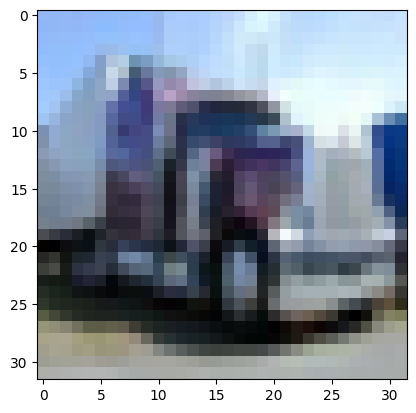

In [8]:
dataIdx = 2020
tmp_img = img_test[dataIdx]
tmp_label = label_test[dataIdx]

with torch.no_grad():
  prediction = network(tmp_img)

prediction_num = torch.argmax(prediction, 1)

print(prediction)
print("prediction: ", dataLabel[prediction_num])
print("label: ", dataLabel[tmp_label])

plt.imshow(np.transpose(tmp_img,(1,2,0)))
plt.show